# Exercise 1

Train a classifier to distinguish between images of cats and dogs.

* Use the [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/).
* Fine-tune a 34-layer ResNet model for 1 epoch
* Report the error rate on a held-out validation set of 20% of the data.

In [12]:
from fastai.vision.all import *

# Make one-channel images display in greyscale.
# See https://forums.fast.ai/t/show-image-displays-color-image-for-mnist-sample-dataset/78932/4
matplotlib.rc('image', cmap='Greys')

In [1]:
path = untar_data(URLs.PETS)/'images'

# Your code here. Include a comment indicating what each line does.

In [2]:
# Cat images have filenames that start with a capital letter.
def is_cat(filename):
    return filename[0].isupper()

image_files = get_image_files(path).sorted()

# Construct the data loader
dataloaders = ImageDataLoaders.from_name_func(
    path=path,
    fnames=image_files,
    # Use a 20% validation split, with a seed of 42 for reproducibiliy
    valid_pct=0.2,
    seed=42,
    # label files using their name
    label_func=is_cat,
    # Resize all images to 224x224 pixels
    item_tfms=Resize(224)
)

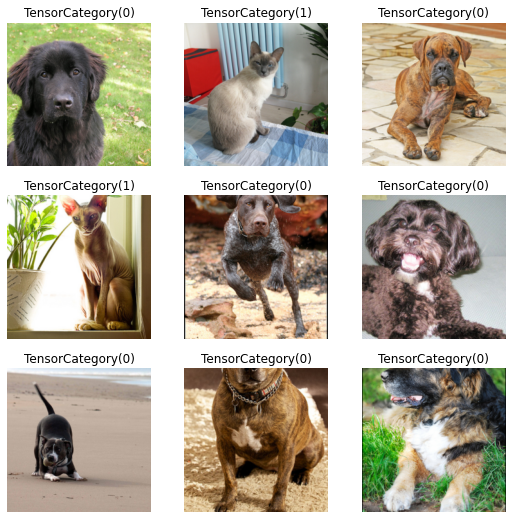

In [4]:
batch = dataloaders.train.one_batch()
images, labels = batch

show_image_batch((images, labels))

In [6]:
images_copy = images.clone()

In [7]:
images.shape

torch.Size([64, 3, 224, 224])

<AxesSubplot:>

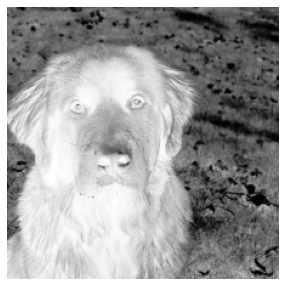

In [14]:
show_image(images[0, 0])

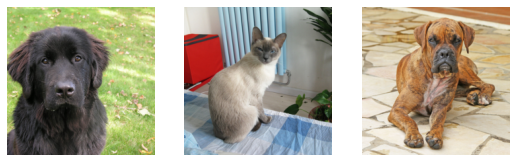

In [15]:
show_images(images[:3])

<AxesSubplot:>

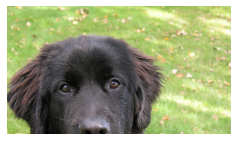

In [18]:
show_image(images[0, :, :128])

# Wrap-up

* Make sure you Save this notebook.
* From the Kernel menu, select "Restart and Run All". This will take a few minutes, but will ensure that all of your code still runs. Double-check that your results still make sense.